In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Define the CNN model
def cnn_model(input_size=(128, 128, 3)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_size),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(6, activation='softmax')  # 6 classes for classification
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [3]:
# Data preparation with ImageDataGenerator
def load_data():
    # Assuming you have a directory with subfolders for each class (train, valid, test)
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Use 20% of the data for validation
    
    train_generator = datagen.flow_from_directory(
        'D:/Apgama/archive/NEU Metal Surface Defects Data/train',  # Train directory path
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',  # For multi-class classification
        subset='training'
    )

    valid_generator = datagen.flow_from_directory(
        'D:/Apgama/archive/NEU Metal Surface Defects Data/valid',  # Same train directory used for validation split
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',  # For multi-class classification
        subset='validation'
    )

    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        'D:/Apgama/archive/NEU Metal Surface Defects Data/test',  # Test directory path
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical'  # For multi-class classification
    )

    return train_generator, valid_generator, test_generator


In [4]:
# Create and summarize the model
model = cnn_model()
model.summary()


C:\Users\rutuj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,414 (12.61 MB)

 Trainable params: 3,305,414 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Load data
train_generator, valid_generator, test_generator = load_data()

# Train the model
model.fit(train_generator, epochs=20, validation_data=valid_generator, 
          steps_per_epoch=train_generator.samples // train_generator.batch_size, 
          validation_steps=valid_generator.samples // valid_generator.batch_size)


Found 1326 images belonging to 6 classes.
Found 12 images belonging to 6 classes.
Found 72 images belonging to 6 classes.
Epoch 1/20


C:\Users\rutuj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 265ms/step - accuracy: 0.2143 - loss: 1.7843 - val_accuracy: 0.4167 - val_loss: 1.5055
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4062 - loss: 1.4712 - val_accuracy: 0.6667 - val_loss: 1.2465
Epoch 3/20


C:\Users\rutuj\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - accuracy: 0.5137 - loss: 1.2033 - val_accuracy: 0.5000 - val_loss: 1.0093
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5938 - loss: 0.8935 - val_accuracy: 0.7500 - val_loss: 0.8456
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 217ms/step - accuracy: 0.6370 - loss: 0.9008 - val_accuracy: 0.8333 - val_loss: 0.6973
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.3579 - val_accuracy: 0.6667 - val_loss: 1.0633
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 219ms/step - accuracy: 0.7761 - loss: 0.6391 - val_accuracy: 0.8333 - val_loss: 0.3580
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8750 - loss: 0.4045 - val_accuracy: 0.8333 - val_loss: 0.2847
Epoch 9/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 222ms/step - accuracy: 0.8339 - loss: 0.4548 - val_accuracy: 0.7500 - val_loss: 0.4185
Epoch 10/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.3814 - val_accuracy: 0.8333 - val_loss: 0

In [6]:
# Save the trained model after training
model.save('metal_surface_defects_model.h5')


In [7]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9223 - loss: 0.2410
Test accuracy: 0.93


In [8]:
# Prediction function
def predict_image(model, image_path):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    input_array = tf.keras.preprocessing.image.img_to_array(image)
    input_array = np.expand_dims(input_array, axis=0) / 255.0
    
    prediction = model.predict(input_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    # Map the predicted class to the actual label
    class_labels = list(test_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]
    
    # Display the original image and the prediction result
    plt.imshow(image)
    plt.title(f'Prediction: {predicted_label}')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


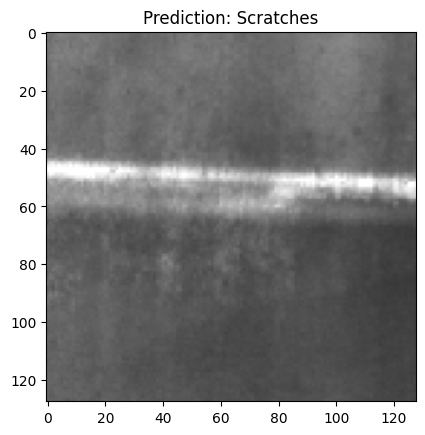

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


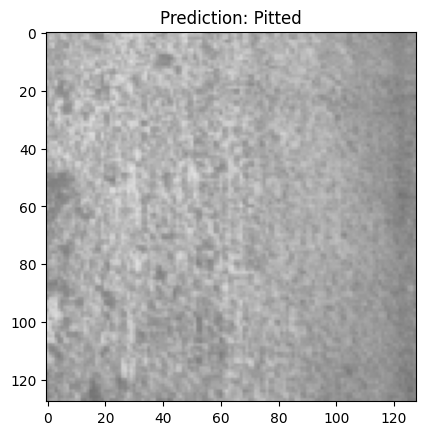

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


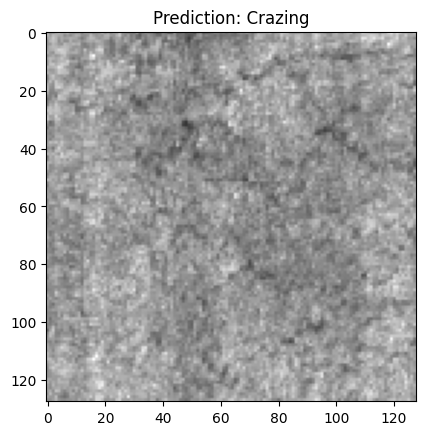

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


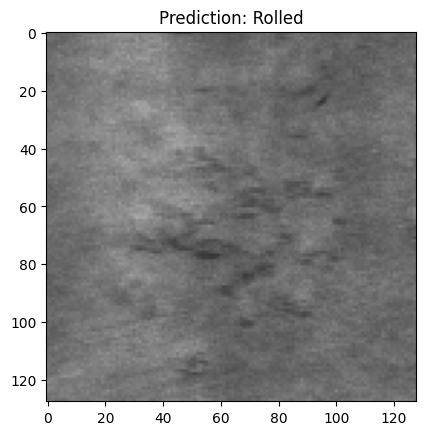

In [9]:
# Load the saved model (when you want to use it for predictions)
model = load_model('metal_surface_defects_model.h5')

# Test the prediction with a sample image (make sure the image path is correct)
# Test the prediction with the correct image path
predict_image(model, r"D:\Apgama\archive\NEU Metal Surface Defects Data\test\Scratches\Sc_101.bmp")

predict_image(model, r"D:\Apgama\archive\NEU Metal Surface Defects Data\test\Pitted\PS_105.bmp")

# Test the prediction with the correct image path
predict_image(model, r"D:\Apgama\archive\NEU Metal Surface Defects Data\test\Crazing\Cr_101.bmp")

predict_image(model, r"D:\Apgama\archive\NEU Metal Surface Defects Data\test\Rolled\RS_104.bmp")







In [10]:
import os

image_path = r"D:/Apgama/archive/NEU Metal Surface Defects Data/test/Patches/Pa_45.bmp"
print(os.path.exists(image_path))  # This will return True if the file exists, False otherwise.


False
